In [110]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
import albumentations as A
DATA_DIR = "/home/ljj0512/shared/data"

In [15]:
print(os.listdir(DATA_DIR))

train_dir1 = os.path.join(DATA_DIR, "png_normal")
print(train_dir1)
print(len(glob.glob(os.path.join(train_dir1, "*"))))

train_dir2 = os.path.join(DATA_DIR, "png_abnormal")
print(train_dir2)
print(len(glob.glob(os.path.join(train_dir2, "*"))))

['Train', 'zipfile', 'sample_submission.csv', 'test', 'Validation', 'png_normal', 'png_abnormal']
/home/ljj0512/shared/data/png_normal
1000
/home/ljj0512/shared/data/png_abnormal
1000


In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset, DataLoader
import albumentations as A
DATA_DIR = "/home/ljj0512/shared/data/torchdata/"
print(os.listdir(DATA_DIR))

train_dir1 = os.path.join(DATA_DIR, "png_normal")
print(train_dir1)
print(len(glob.glob(os.path.join(train_dir1, "*"))))

train_dir2 = os.path.join(DATA_DIR, "png_abnormal")
print(train_dir2)
print(len(glob.glob(os.path.join(train_dir2, "*"))))

['1000_sample_submission.csv', 'png_normal', 'png_abnormal']
/home/ljj0512/shared/data/torchdata/png_normal
1000
/home/ljj0512/shared/data/torchdata/png_abnormal
1000


In [18]:
# classes = {
#     "Normal":0,
# }
img_path_list = []
label_list = []
for path in (glob.glob(os.path.join(train_dir1, "*"))):
    if ".DS_Store" in path:
        print("pass")
    else:
        img_path_list.append(path)
        label_list.append(0)

for path in (glob.glob(os.path.join(train_dir2, "*"))):
    if ".DS_Store" in path:
        print("pass")
    else:
        img_path_list.append(path)
        label_list.append(1)

train_df = pd.DataFrame({ "image_path":img_path_list,
                          "label":label_list    })

In [19]:
train_df

,image_path,label
0,/home/ljj0512/shared/data/png_normal/Promedius...,0
1,/home/ljj0512/shared/data/png_normal/Promedius...,0
2,/home/ljj0512/shared/data/png_normal/Promedius...,0
3,/home/ljj0512/shared/data/png_normal/Promedius...,0
4,/home/ljj0512/shared/data/png_normal/Promedius...,0
...,...,...
1995,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
1996,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
1997,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
1998,/home/ljj0512/shared/data/png_abnormal/Promedi...,1


In [50]:
from sklearn.model_selection import train_test_split
train_set ,val_set,  train_target, val_target = train_test_split(
        train_df["image_path"], train_df["label"], test_size=0.025, shuffle=True
    )
trainDF = pd.concat([train_set, train_target], axis=1)
valDF = pd.concat([val_set, val_target], axis=1)

In [51]:
trainDF

,image_path,label
1376,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
349,/home/ljj0512/shared/data/png_normal/Promedius...,0
1694,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
194,/home/ljj0512/shared/data/png_normal/Promedius...,0
1337,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
...,...,...
1849,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
612,/home/ljj0512/shared/data/png_normal/Promedius...,0
1033,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
1928,/home/ljj0512/shared/data/png_abnormal/Promedi...,1


In [53]:
trainDF.to_csv("./train_df.csv")

In [52]:
valDF

,image_path,label
373,/home/ljj0512/shared/data/png_normal/Promedius...,0
1977,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
1812,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
749,/home/ljj0512/shared/data/png_normal/Promedius...,0
815,/home/ljj0512/shared/data/png_normal/Promedius...,0
936,/home/ljj0512/shared/data/png_normal/Promedius...,0
1697,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
691,/home/ljj0512/shared/data/png_normal/Promedius...,0
1742,/home/ljj0512/shared/data/png_abnormal/Promedi...,1
133,/home/ljj0512/shared/data/png_normal/Promedius...,0


In [54]:
valDF.to_csv("./val_df.csv")

In [49]:
count = 0
for i in trainDF["label"]:
    if i==0:
        count+=1
print(count)

975


In [20]:
train_df.to_csv("train_df.csv")

In [1]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from utils import ColorJitter, Lighting
from torchvision.datasets import ImageFolder
from PIL import Image
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        img_path = self.df["image_path"].iloc[index]
        if self.transform:
            image = self.transform(Image.open(img_path))
        else:
            image = io.imread(img_path) # numpy array로 읽어옴
        label = self.df["label"].iloc[index]
        return [image, label]

def get_transform(param):
    if param == "train":
        transform = transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomAdjustSharpness(sharpness_factor=2),
                        transforms.ToTensor(),
                    ])
    elif param == "test":
        transform = transforms.Compose([
                        transforms.ToTensor(),
                    ])
    return transform

train_df = pd.read_csv("./train_df.csv")
val_df = pd.read_csv("./val_df.csv")
train_set = CustomDataset(train_df, transform=get_transform("train"))
print(len(train_set))
val_set = CustomDataset(val_df, transform=get_transform("test"))
print(len(val_set))
print()

train_loader = DataLoader(dataset=train_set,
                                batch_size=16,
                                shuffle=True,
                                num_workers=4)
print(len(train_loader))

val_loader = DataLoader(dataset=val_set,
                            batch_size=16,
                            shuffle=False,
                            num_workers=4)
print(len(val_loader))

1950
50

122
4


torch.Size([16, 1, 1024, 1024])
torch.Size([16])


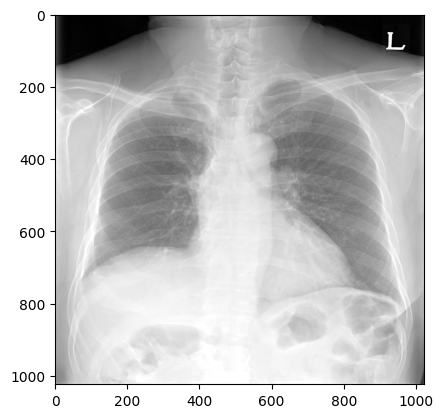

tensor(1)


In [2]:
for image, target in train_loader:
    print(image.shape)
    print(target.shape)
    plt.imshow(image[0].permute(1,2,0),cmap='gray')
    plt.show()
    print(target[0])
    break

In [15]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets
from utils import ColorJitter, Lighting
from torchvision.datasets import ImageFolder
from PIL import Image
from skimage import io
import pandas as pd
import matplotlib.pyplot as plt

class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        img_path = self.df["image_path"].iloc[index]
        if self.transform:
            image = self.transform(Image.open(img_path))
        else:
            image = io.imread(img_path) # numpy array로 읽어옴
        label = self.df["label"].iloc[index]
        return [image, label]

def get_transform(param):
    if param == "train":
        transform = transforms.Compose([
                        transforms.Resize(512),
                        transforms.RandomHorizontalFlip(),
                        transforms.RandomAdjustSharpness(sharpness_factor=10,p=1),
                        transforms.ToTensor(),
                    ])
    elif param == "test":
        transform = transforms.Compose([
                        transforms.ToTensor(),
                    ])
    return transform

train_df = pd.read_csv("./train_df.csv")
val_df = pd.read_csv("./val_df.csv")
train_set = CustomDataset(train_df, transform=get_transform("train"))
print(len(train_set))
val_set = CustomDataset(val_df, transform=get_transform("test"))
print(len(val_set))
print()

train_loader = DataLoader(dataset=train_set,
                                batch_size=16,
                                shuffle=True,
                                num_workers=4)
print(len(train_loader))

val_loader = DataLoader(dataset=val_set,
                            batch_size=16,
                            shuffle=False,
                            num_workers=4)
print(len(val_loader))

1950
50

122
4


torch.Size([16, 1, 512, 512])
torch.Size([16])


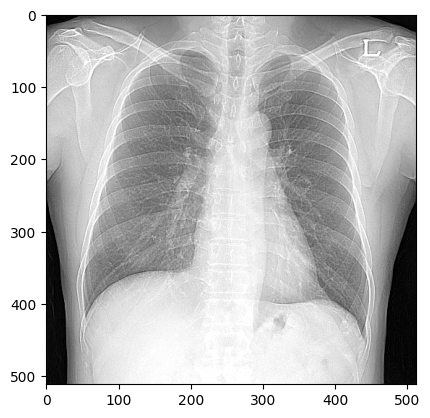

tensor(0)


In [16]:
for image, target in train_loader:
    print(image.shape)
    print(target.shape)
    plt.imshow(image[0].permute(1,2,0),cmap='gray')
    plt.show()
    print(target[0])
    break

torch.Size([1, 1024, 1024])


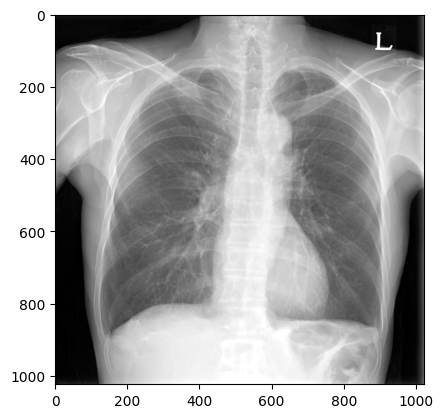

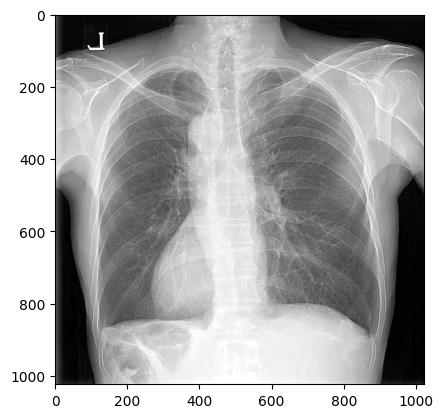

In [14]:
print(train_set[0][0].shape)
import matplotlib.pyplot as plt
img = transforms.RandomAdjustSharpness(sharpness_factor=10,p=1)(train_set[0][0])
plt.imshow(train_set[0][0].permute(1,2,0), cmap="gray")
plt.show()
plt.imshow(img.permute(1,2,0), cmap='gray')
plt.show()

In [114]:
class TestDataset(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.dir = "/home/ljj0512/private/workspace/CP_urban-datathon_X-ray/test"
    
    def __len__(self):
        return len(os.listdir(self.dir))

    def __getitem__(self, index):
        img_path = os.listdir(self.dir)[index]
        image = self.transform(Image.open(img_path))
        return image

import os
print(len(os.listdir("/home/ljj0512/private/workspace/CP_urban-datathon_X-ray/test")))

588


In [62]:
from torchvision.models import  EfficientNet_B6_Weights, efficientnet_b6, EfficientNet_B0_Weights, efficientnet_b0
import torch.nn as nn
import torch

model = efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
# print(model)
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3,3), stride=(2,2), padding=(1,1), bias=False)
# print(model)
x = sum([p.data.nelement() for p in model.parameters()])
print(f"{x:,}")
x = torch.randn((16,1,224,224))
output = model(x)
print(output.shape)

5,287,972
torch.Size([16, 1000])


In [68]:
from torchvision.models import  EfficientNet_B6_Weights, efficientnet_b6, EfficientNet_B0_Weights, efficientnet_b0
from torchvision import models
import torch.nn as nn
import torch

model = models.efficientnet_b6(weights=EfficientNet_B6_Weights.DEFAULT)
model.features[0][0] = nn.Conv2d(1, 56, kernel_size=(3,3), stride=(2,2), padding=(1,1), bias=False)
model.classifier[1] = nn.Linear(in_features=2304, out_features=1, bias=True)
x = sum([p.data.nelement() for p in model.parameters()])
print(f"{x:,}")
x = torch.randn((16,1,224,224))
output = model(x)
print(output.shape)

40,737,001
torch.Size([16, 1])


In [70]:
from torchvision.models import  EfficientNet_B6_Weights, efficientnet_b6, EfficientNet_B0_Weights, efficientnet_b0
from torchvision import models
import torch.nn as nn
import torch
model = models.efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3,3), stride=(2,2), padding=(1,1), bias=False)
model.classifier[1] = nn.Linear(in_features=1280, out_features=1, bias=True)
x = sum([p.data.nelement() for p in model.parameters()])
print(f"{x:,}")
x = torch.randn((16,1,224,224))
output = model(x)
print(output.shape)

4,008,253
torch.Size([16, 1])


In [71]:
from torchvision.models import  EfficientNet_B6_Weights, efficientnet_b6, EfficientNet_B0_Weights, efficientnet_b0, resnet18
import torch.nn as nn
import torch

model = resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7,7), stride=(2,2), padding=(3,3), bias=False)
model.fc = nn.Linear(in_features=512, out_features=1, bias=True)
x = sum([p.data.nelement() for p in model.parameters()])
print(f"{x:,}")
x = torch.randn((16,1,224,224))
output = model(x)
print(output.shape)

11,170,753
torch.Size([16, 1])


In [81]:
output = torch.randn((16,1))
print(output.reshape(1,-1))
# _, predicted = torch.max(output.data, dim=1)
# print(predicted)
# output = output.squeeze(1).to('cpu')
# print(output.shape)

tensor([[-1.0947, -0.7651, -0.2921,  1.6021,  1.0831,  0.1585, -1.6850,  0.3541,
          1.1010, -0.7022,  0.9548,  2.3219,  1.4937,  0.0521, -1.0141, -0.6690]])


In [105]:
import numpy as np
pred_labels = []

output = torch.randn((16,5))
_, predicted = torch.max(output.data, dim=1)
print(predicted.shape)
predicted = predicted.to('cpu')
print(predicted.shape)

output = output.squeeze(1).to('cpu')  
print(output.shape)
pred_labels += output.tolist()
print(pred_labels)
print()
x = np.where(np.array(pred_labels) > 0.5, 1, 0)
print(type(x))


torch.Size([16])
torch.Size([16])
torch.Size([16, 5])
[[-2.564119338989258, 1.7391366958618164, -0.9770791530609131, 0.37671640515327454, 0.182563915848732], [-0.14588068425655365, 0.5666419863700867, -0.8037362694740295, 1.5439631938934326, -0.0012013299856334925], [-0.00011982368596363813, -0.34070172905921936, 1.1750261783599854, -0.21001313626766205, 0.5054165720939636], [1.5622159242630005, 1.1463449001312256, -0.18884897232055664, -0.5261187553405762, 0.8268516659736633], [0.24662864208221436, -0.3719242215156555, -2.7492735385894775, -1.3901523351669312, -0.42133721709251404], [0.381009042263031, 0.7440391778945923, -0.6552081108093262, -1.5415617227554321, 1.8783868551254272], [0.3577541410923004, 2.08663272857666, -1.0068556070327759, 0.30215099453926086, -0.6672188639640808], [-2.6739909648895264, -0.8649417161941528, -0.8146624565124512, -1.9215866327285767, -0.13495486974716187], [0.0976252481341362, -0.4223295748233795, 0.18809138238430023, -0.6480298042297363, -0.54000747

In [87]:
import torch.nn as nn
c = nn.BCEWithLogitsLoss()
x = torch.randn((16,1))
y = torch.randn((16))
loss = c(x,y.reshape(-1,1))
print(loss.item())

0.719311535358429


In [103]:
from sklearn import metrics
# y_true = [0, 1, 2, 0, 1, 2]
# y_pred = [0, 2, 1, 0, 0, 1]
true_labels = [0, 1, 2, 0, 1, 2, 3]
pre_labels = [0, 2, 1, 0, 0, 1, 3]
f1_score = metrics.f1_score(y_true=true_labels, y_pred=pre_labels, average='macro')
print(f1_score)


0.45


In [109]:
true_labels = np.array([0, 1, 1, 0, 1, 0, 1])
pre_labels =  np.array([0, 1, 1, 0, 0, 1, 1])
print(true_labels==pre_labels)
print((true_labels==pre_labels).sum())
print((true_labels==pre_labels).sum()/len(true_labels))

[ True  True  True  True False False  True]
5
0.7142857142857143


In [79]:
i = 900
print(val_df["image_path"][i])
print(val_df["label"][i])
print(val_df.shape[0])

/home/ljj0512/shared/data/Validation/ILD/ChestCT_ILD_00001267.png
2
1000


In [80]:
print(train_df["image_path"][8000])
print(train_df["label"][8000])
print(train_df.shape[0])

/home/ljj0512/shared/data/Train/ILD/ChestCT_ILD_00000155.png
2
8006


In [47]:
from PIL import Image
from skimage import io
class CustomDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
    
    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, index):
        img_path = self.df["image_path"].iloc[index]
        if self.transform:
            image = self.transform(Image.open(img_path))
        else:
            image = io.imread(img_path) # numpy array로 읽어옴
        label = self.df["label"].iloc[index]
        return [image, label]

In [5]:
def get_transform(param):
    if param == "train":
        transform = transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                    ])
    elif param == "valid":
        transform = transforms.Compose([
                        transforms.RandomHorizontalFlip(),
                        transforms.ToTensor(),
                    ])
    return transform
    


In [98]:
import pandas as pd
train_df = pd.read_csv("train_df.csv")
train_set = CustomDataset(train_df, transform=transforms.Compose([
                        transforms.Resize((32,32)),
                        transforms.RandomHorizontalFlip(),z
                        transforms.ToTensor(),
                    ]))
train_loader = DataLoader(dataset=train_set,
                                batch_size=16,
                                shuffle=True,
                                num_workers=4)

In [99]:
import time
import torch.nn as nn
import numpy as np
from sklearn import metrics
from torchvision.models import EfficientNet_B6_Weights, efficientnet_b6
import torchvision.models as models

model = models.efficientnet_b6(weights=EfficientNet_B6_Weights.DEFAULT)
model.classifier[1] = nn.Linear(in_features=2304, out_features=5, bias=True)
model.cuda()
model.eval()
pred_labels = []
true_labels = []
total = 0
correct = 0
threshold = 0.5
criterion = nn.CrossEntropyLoss()

for i, (input, target) in enumerate(train_loader):
    target = target.cuda()
    input = input.cuda()
    true_labels += target.tolist()

    output = model(input)
    loss = criterion(output, target)

    # measure accuracy and record loss
    _, predicted = torch.max(output.data, dim=1)
    total += target.size(0)
    correct += predicted.eq(target.data).cpu().sum()
    output = output.squeeze(1).to('cpu')
    print(output.shape)
    pred_labels += output.tolist()


pred_labels = np.where(np.array(pred_labels) > threshold, 1, 0)
f1_score = metrics.f1_score(y_true=true_labels, y_pred=pred_labels, average='macro')
print(f1_score)

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 23.70 GiB total capacity; 7.40 GiB already allocated; 10.69 MiB free; 7.42 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

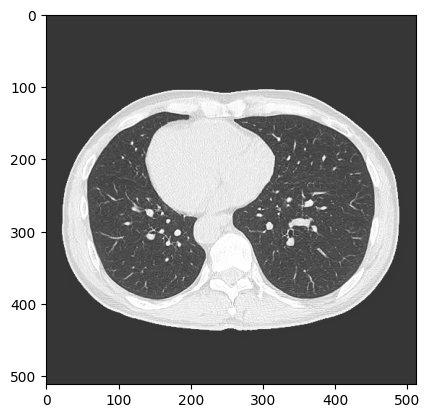

torch.Size([3, 512, 512])
0


In [82]:
i = 999
plt.imshow(train_set[i][0].permute(1,2,0))
plt.show()
print(train_set[i][0].shape)
print(train_set[i][1])

In [8]:
trainset = ImageFolder(root = DATA_DIR+"/Train",
                        transform = get_transform("train"))

validationset = ImageFolder(root = DATA_DIR+"/Validation",
                            transform = get_transform("valid"))

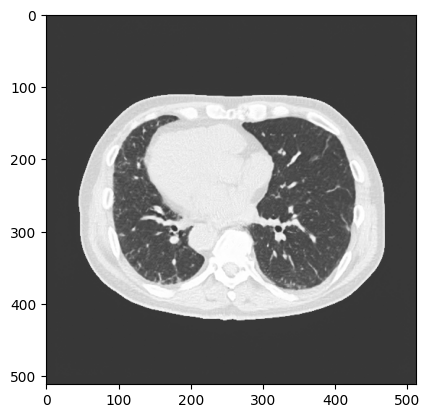

torch.Size([3, 512, 512])
0
8001
1000


In [30]:
import matplotlib.pyplot as plt

i = 999
plt.imshow(trainset[i][0].permute(1,2,0))
plt.show()
print(trainset[i][0].shape)
print(trainset[i][1])
print(len(trainset))
print(len(validationset))

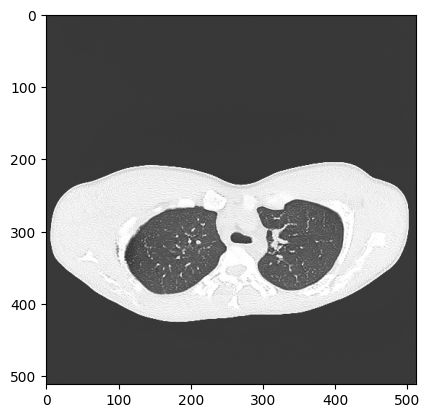

In [16]:
from skimage import io
x = io.imread("/home/ljj0512/shared/data/Train/pneumothorax/ChestCT_Pneumothorax_00001569.png")
plt.imshow(x)

In [90]:
class TestDataset(Dataset):
    def __init__(self, transform=None):
        self.transform = transform
        self.dir = "/home/ljj0512/shared/data/test"
    
    def __len__(self):
        return len(os.listdir(self.dir))

    def __getitem__(self, index):
        img_path = os.listdir(self.dir)[index]
        image = self.transform(Image.open(img_path))
        return image
transform = transforms.Compose([
                        transforms.ToTensor(),
                    ])
test_set = TestDataset(transform=transform)
print(len(test_set))


999


In [106]:
import torch
x = torch.randn((16,5))
print(len(x.squeeze(1).tolist()[0]))

5


In [3]:
import numpy as np
print(np.where(np.array([0.1,0.6]) > 0.5, 1, 0))

[0 1]
